# Main Project File
This is the main file for the project. It contains the core analysis and model development workflow.


In [1]:
# Standard library imports
import os

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Custom helper classes
from modelhelper import ModelHelper
from helperclasses import DataFetcherKAGGLE

# Scikit-learn preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn models
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)
from sklearn.svm import SVC, SVR

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    r2_score
)
model_helper = ModelHelper()

Fetching flight dataset from Kaggle...


INFO:modelhelper:Optimizing flight dataset data types...


Preparing flight dataset...


c:\Projects\homework\Project-2\src\modelhelper.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')
c:\Projects\homework\Project-2\src\modelhelper.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
c:\Projects\homework\Project-2\src\modelhelper.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

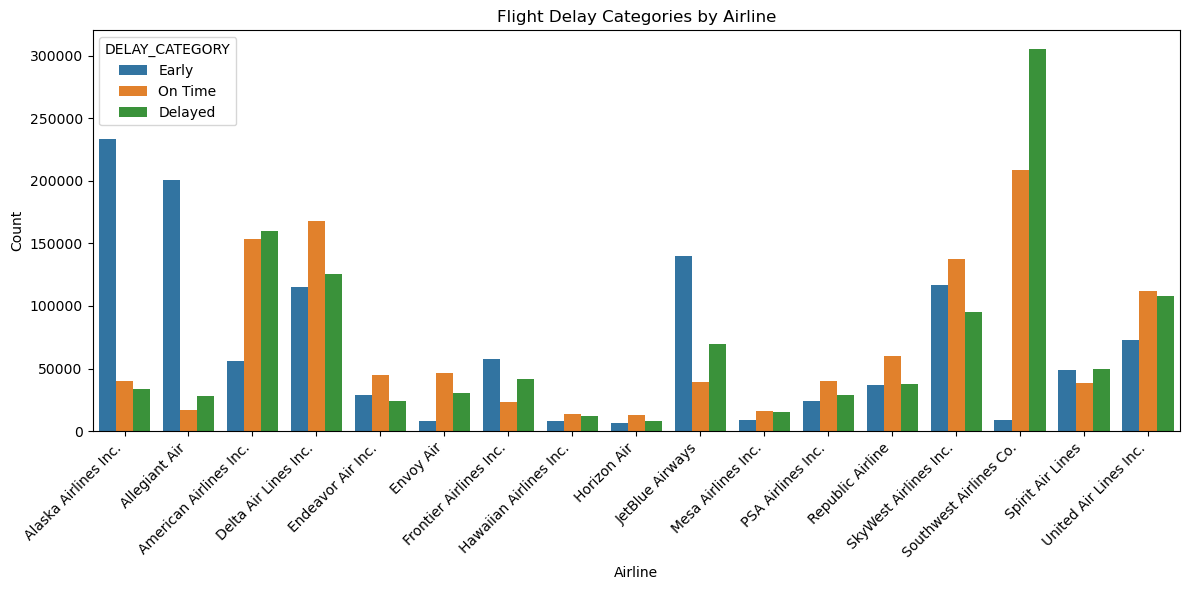

In [2]:
flight_data = model_helper.fetch_flight_dataset()
# Create a bar plot showing delay categories by airline
plt.figure(figsize=(12, 6))
sns.countplot(data=flight_data, x='AIRLINE', hue='DELAY_CATEGORY')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flight Delay Categories by Airline')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

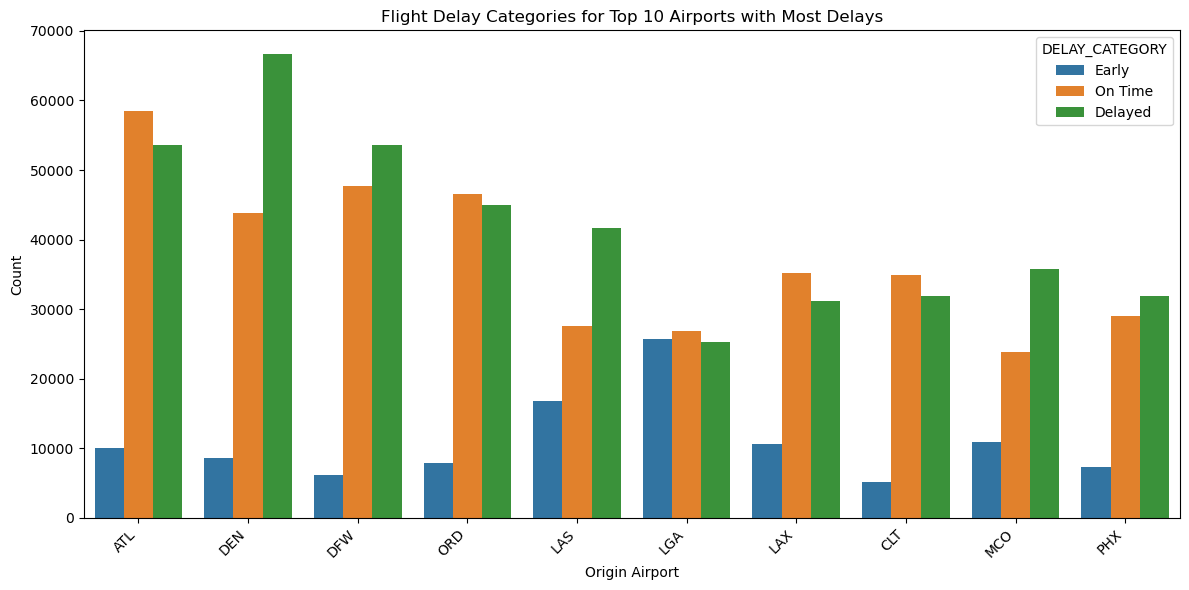

In [4]:
# Get the top 10 airports with most delays
delayed_flights = flight_data[flight_data['DELAY_CATEGORY'] != 'No Delay']
top_10_airports = delayed_flights['ORIGIN'].value_counts().nlargest(10).index

# Filter data for top 10 airports
plot_data = flight_data[flight_data['ORIGIN'].isin(top_10_airports)]

# Create a bar plot showing delay categories for top 10 airports
plt.figure(figsize=(12, 6))
sns.countplot(data=plot_data, x='ORIGIN', hue='DELAY_CATEGORY', order=top_10_airports)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Origin Airport')
plt.ylabel('Count')
plt.title('Flight Delay Categories for Top 10 Airports with Most Delays')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


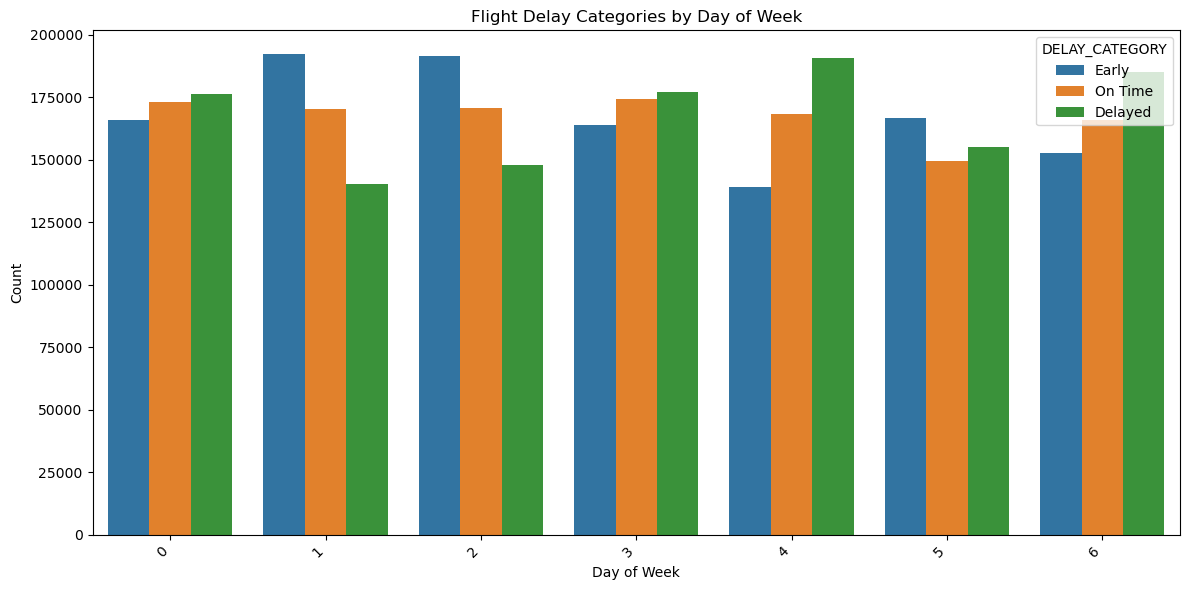

In [5]:
# Create a bar plot showing delay categories by day of week
plt.figure(figsize=(12, 6))
sns.countplot(data=flight_data, x='DAY_OF_WEEK', hue='DELAY_CATEGORY')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Flight Delay Categories by Day of Week')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()